<br>

## 1. 교차분석의 실습과 시각화

In [1]:
import pandas as pd
import seaborn as sns

import scipy as sp
from scipy import stats

In [2]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


![image.png](attachment:image.png)

In [3]:
pd.crosstab(df.propensity, df.skin, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# propensity : 구매 성향 (비교적 저렴한 제품, 중간 정도의 제품, 비교적 고가의 제품)
# skin : 피부 타입 (건성, 민감성, 중성, 지성/여드름성, 복합성)

skin,1,2,3,4,5,All
propensity,,,,,,
1,22,1,12,11,14,60
2,39,8,47,16,23,133
3,20,11,10,4,9,54
All,81,20,69,31,46,247


In [253]:
crosstab = pd.crosstab(df.propensity, df.skin, margins=True)

crosstab.columns=["건성", "민감성", "중성", "지성", "여드름성", "합계"]
crosstab.index=["비교적 저렴한 제품", "중간정도의 제품", "비교적고가의 제품", "합계"]
crosstab

,건성,민감성,중성,지성,여드름성,합계
비교적 저렴한 제품,22,1,12,11,14,60
중간정도의 제품,39,8,47,16,23,133
비교적고가의 제품,20,11,10,4,9,54
합계,81,20,69,31,46,247


In [254]:
pd.crosstab(df.propensity, df.skin, margins=True, normalize=True)

skin,1,2,3,4,5,All
propensity,,,,,,
1,0.089069,0.004049,0.048583,0.044534,0.056680,0.242915
2,0.157895,0.032389,0.190283,0.064777,0.093117,0.538462
3,0.080972,0.044534,0.040486,0.016194,0.036437,0.218623
All,0.327935,0.080972,0.279352,0.125506,0.186235,1.000000


In [255]:
stats.chisquare(df.propensity, df.skin) 

# 귀무가설 : 구매 성향에 따라 피부 타입에 차이가 없다. (구매 성향 <-> 피부 타입, vice versa)
# 대립가설 : 구매 성향에 따라 피부 타입에 차이가 있다.

# p-value가 0.05 이하 -> 유의미한 차이가 있다.

Power_divergenceResult(statistic=291.8166666666667, pvalue=0.023890557260065975)

In [ ]:
df['propensity'] = df['propensity'].replace([1, 2, 3], ['low cost', 'middle cost', 'high cost'])
df['skin'] = df['skin'].replace([1, 2, 3, 4, 5], ['dry skin', 'sensitive skin', 'neutral skin', 'oily skin', 'complex skin'])

ct = pd.crosstab(df.propensity, df.skin, margins=True)

ct.plot.bar(stacked=True)

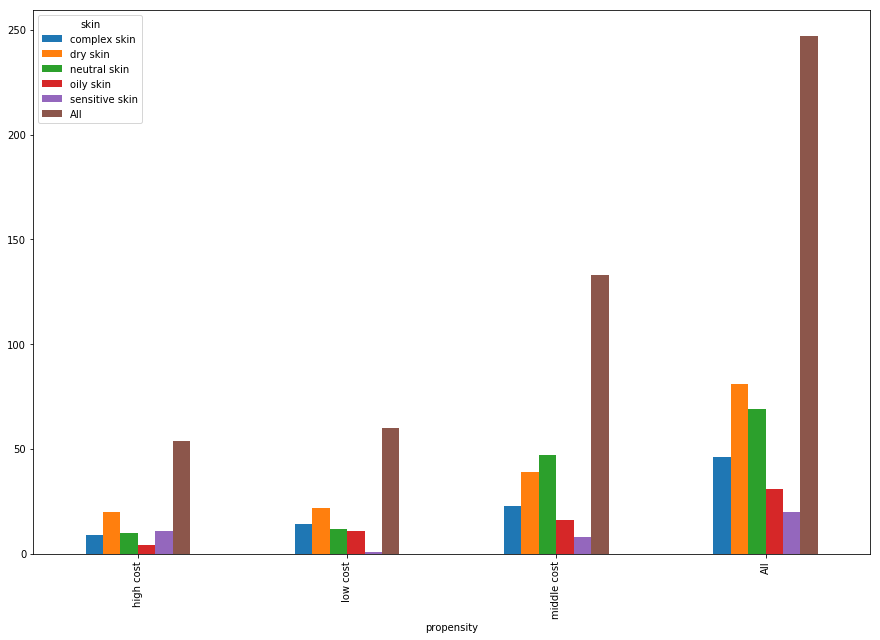

In [268]:
ct.plot.bar(stacked=False, figsize=(15, 10))

<br>

## 2. 독립표본 t-test분석의 실습과 시각화

#### 두 집단간의 평균차이를 검정

In [272]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


In [276]:
# satisf_al : 전반적인 만족도 (매우 불만족, 불만족, 보통, 만족, 매우 만족)

male = df[ df['gender']==1 ].satisf_al.values # gender가 1인 행들의 satisf_al 열의 값들
female = df[ df['gender']==2 ].satisf_al.values

In [277]:
male

array([2, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 4, 3,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 5, 4, 3, 3, 3,
       3, 4, 4, 5, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3,
       4, 4, 5, 1, 4, 4, 3, 4, 4, 3, 4, 3, 1, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 1, 1, 3],
      dtype=int64)

In [282]:
stats.ttest_ind(male, female) # T-test for the means of two independent samples 

# "서로 다른" 성별 간에 전반적인 만족도의 평균값 사이에 유의미한 차이가 "없다"

Ttest_indResult(statistic=-0.494589803056421, pvalue=0.6213329051985961)

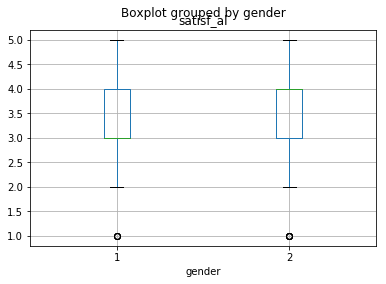

In [285]:
df.boxplot(column='satisf_al', by='gender')

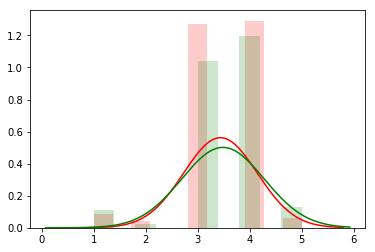

In [293]:
# kde=False 로 해주어야 각각의 빈도 수에 따른 그래프를 가리고 평균만 나타낼 수 있음
# fit에 scipy.stats.norm을 지정하여 평균을 나타내는 그래프 선을 그릴 수 있음
# hist_kws & fit_kws 는 히스토그램과 fitting line의 서식을 지정하는 keywords

sns.distplot(male, kde=False, fit=stats.norm,
            hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})

sns.distplot(female, kde=False, fit=stats.norm, 
             hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})

<br>

## 3. 대응표본 t-test분석의 실습과 시각화
#### 동일한 모집단으로부터 추출된 두 변수의 평균값을 비교 분석

In [294]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')

In [303]:
df[['satisf_b', 'satisf_i']].describe()

# satisf_b : 구매 가격에 대한 만족도 (5점 척도)
# satisf_i : 구매 문의에 대한 만족도 (5점 척도)

,satisf_b,satisf_i
count,247.000000,247.000000
mean,2.890688,3.404858
std,0.780995,0.830110
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


In [305]:
stats.ttest_rel(df["satisf_b"], df["satisf_i"])

# 귀무가설 : 247명의 고객이 평가한 구매 가격에 대한 만족도의 평균은 구매 문의에 대한 만족도의 평균과 차이가 없다.
# 귀무가설 : 247명의 고객이 평가한 구매 가격에 대한 만족도의 평균은 구매 문의에 대한 만족도의 평균과 차이가 있다.

# "동일한" 고객 집단이 평가한 구매 가격에 대한 만족도와 구매 문의에 대한 만족도의 평균값 사이에 유의미한 차이가 있다.

Ttest_relResult(statistic=-7.155916401026872, pvalue=9.518854506666398e-12)

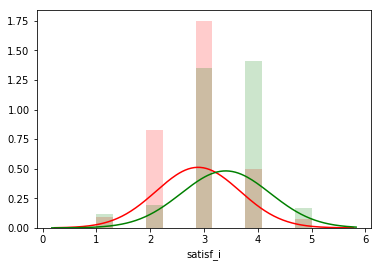

In [313]:
# kde=False 로 해주어야 각각의 빈도 수에 따른 그래프를 가리고 평균만 나타낼 수 있음
# fit에 scipy.stats.norm을 지정하여 평균을 나타내는 그래프 선을 그릴 수 있음
# hist_kws & fit_kws 는 히스토그램과 fitting line의 서식을 지정하는 keywords

sns.distplot(df["satisf_b"], kde=False, fit=stats.norm,
            hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})

sns.distplot(df["satisf_i"], kde=False, fit=stats.norm, 
             hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})

<br>

## 4. 분산분석의 실습과 시각화

In [314]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')

In [316]:
# decision : 구매동기 (사회적 요인, 심리적 요인, 외모적 요인)
# satisf_al : 전반적인 만족도

anova1 = df[ df['decision']==1 ].satisf_al.values
anova2 = df[ df['decision']==2 ].satisf_al.values
anova3 = df[ df['decision']==3 ].satisf_al.values

In [317]:
stats.f_oneway(anova1, anova2, anova3) # oneway == 독립변수가 1개 ("구매동기")

# 귀무가설 : 구매동기에 따라 전반적인 만족도의 평균값에 차이가 없다.
# 귀무가설 : 구매동기에 따라 전반적인 만족도의 평균값 중 적어도 하나는 차이가 있다.

# 3가지 구매 동기에 따른 전반적인 만족도의 평균값 중 적어도 하나는 유의미한 차이가 있다.

F_onewayResult(statistic=4.732129410493065, pvalue=0.009632034309915485)

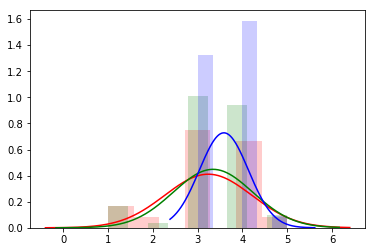

In [324]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm, hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})
sns.distplot(anova2, kde=False, fit=sp.stats.norm, hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})
sns.distplot(anova3, kde=False, fit=sp.stats.norm, hist_kws={'color': 'b', 'alpha': 0.2}, fit_kws={'color': 'b'})

<br>

## 5. 상관관계분석의 실습과 시각화

In [325]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')

In [331]:
df_corr = df[['decision', 'satisf_b', 'satisf_i', 'satisf_al', 'repurchase']]

In [338]:
df_corr.corr() # 피어슨 상관계수, -1에 가까울수록 음의 상관관계, 1에 가까울수록 양의 상관관계, 0에 가까울수록 상관관계가 적음

,decision,satisf_b,satisf_i,satisf_al,repurchase
decision,1.000000,0.003376,0.135887,0.189271,0.219292
satisf_b,0.003376,1.000000,0.018379,-0.031382,-0.028924
satisf_i,0.135887,0.018379,1.000000,0.584506,0.510771
satisf_al,0.189271,-0.031382,0.584506,1.000000,0.565028
repurchase,0.219292,-0.028924,0.510771,0.565028,1.000000


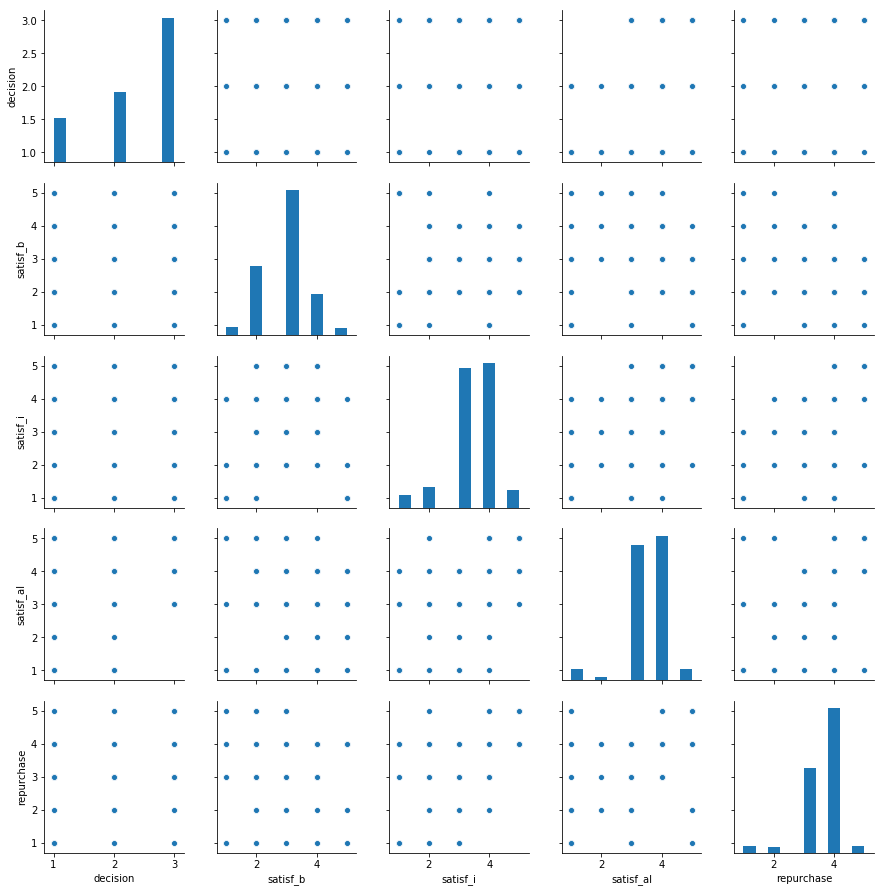

In [339]:
sns.pairplot(df_corr)

In [343]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [344]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


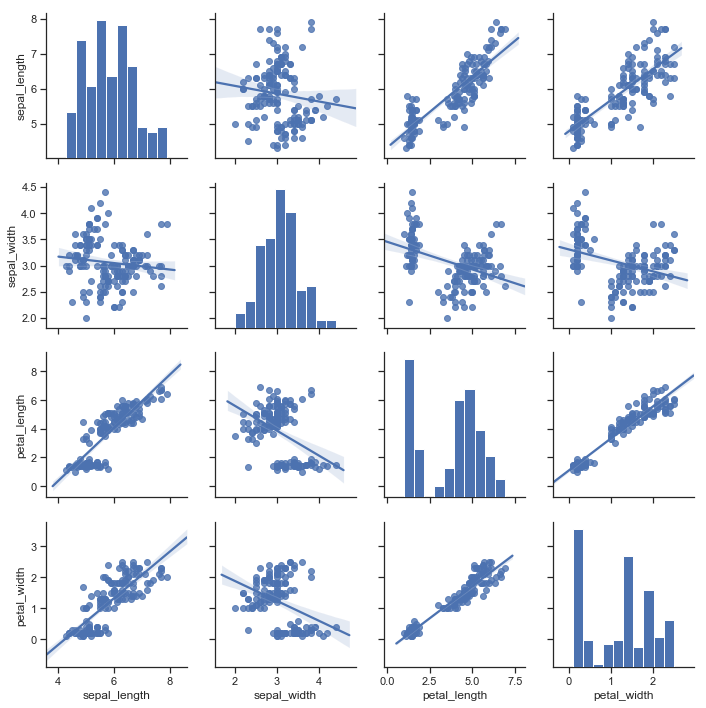

In [342]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, kind="reg")

<br>

### * 파이썬을 활용한 선형회귀분석과 더미회귀분석은 머신러닝에서 다루도록 하겠습니다.